In [62]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import os

#from mpltools import special ##leon

class RawData(object):
    def __init__(self,timestamp,keytime,ttime,keypress,targetid,target_lon,target_lat,target_x,target_y,target_z,hmd_rx,hmd_ry,hmd_rz):
        self.timestamp=timestamp
        self.keytime=keytime
        self.ttime=ttime
        self.keypress=keypress
        self.targetid=targetid
        self.target_lon=target_lon
        self.target_lat=target_lat
        self.target_x=target_x
        self.target_y=target_y
        self.target_z=target_z
        self.hmd_rx=hmd_rx
        self.hmd_ry=hmd_ry
        self.hmd_rz=hmd_rz

def read_data(file,rawdata):
    print("Reading %s"%file)
    seperator="\t"
    with open(file,"r") as fp:
        for line in fp:
            if line.startswith("Time"):
                continue
            l=line[:-1]
            f=l.split(seperator) 
            if(int(f[3])==1):
                rawdata.append(RawData(f[0],float(f[1]),float(f[2]),float(f[3]),float(f[4]),float(f[5]),float(f[6]),float(f[7]),float(f[8]),float(f[9]),float(f[10]),float(f[11]),float(f[12])))
            else: 
                rawdata.append(RawData(f[0],float(f[1]),float(f[2]),float(f[3]),0,0,0,0,0,0,float(f[10]),float(f[11]),float(f[12])))
                
            
    return rawdata

#def read_data(file,rawdata):
#    print("Reading %s"%file)
#    seperator="\t"
#    with open(file,"r") as fp:
#        for line in fp:
#            if line.startswith("Time"):
#                continue
#            l=line[:-1]
#            f=l.split(seperator) 
#            if(int(f[3])==1):
#                rawdata.append(RawData(f[0],float(f[1]),float(f[2]),float(f[3]),float(f[4]),float(f[5]),float(f[6]),float(f[7]),float(f[8]),float(f[9]),float(f[10]),float(f[11]),float(f[12])))
#            else: 
#                rawdata.append(RawData(f[0],float(f[1]),float(f[2]),float(f[3]),0,0,0,0,0,0,float(f[10]),float(f[11]),float(f[12])))
#    return rawdata

class TimeData(object):
    def __init__(self,targetid,target_lon,target_lat,deltatime):
        self.targetid=targetid
        self.target_lon=target_lon
        self.target_lat=target_lat
        self.deltatime=deltatime

def process_time(raw_data):
    timeData={}
    filteredData=[a for a in raw_data if a.keypress==1]
    for i in range(len(filteredData)-1):
        if(filteredData[i+1].targetid!=filteredData[i].targetid):
            continue
        deltaTime=filteredData[i+1].ttime-filteredData[i].ttime
        #headSpeedYaw = hmd_y / deltatime
        #headSpeedPitch = hmd_x /deltatime
        #math.degrees(math.acos(math.cos(0) * math.cos(target_lat) * math.cos(target_lon - 0) + math.sin(0) * math.sin(target_lat)))
        #visionSpeedYaw = target_lon
        #visionSpeedPitch = target_lat
        #aimAccuracyYaw = hmd_y / target_lon
        #aimAccuracyYaw = hmd_x / target_lat
        key1=str(int(filteredData[i].target_lat))
        key2=str(int(filteredData[i].target_lon))
        if(key1 in timeData)==False:
            timeData[key1]={}
        if(key2 in timeData[key1])==False:
            timeData[key1][key2]=[]
        
        timeData[key1][key2].append(TimeData(filteredData[i].targetid,filteredData[i].target_lon,filteredData[i].target_lat,deltaTime))
#    timeData['0']['0'].append((21,0,0,0))
        #print(timeData[key1][str(key2)].deltatime)
        #print(key1, key2)
    return timeData

def plotTrial(raw_data,fig,raw,col,idx):
    #fig = plt.figure()
    ax = fig.add_subplot(raw,col,idx)
    for i in range(13):
        tx=[a.tx for a in raw_data if a.keypress==1]
        ty=[a.ty for a in raw_data if a.fittstrial==trial and a.tid==i]
        x=[a.x for a in raw_data if a.fittstrial==trial and a.tid==i]
        y=[a.y for a in raw_data if a.fittstrial==trial and a.tid==i]
        z=[a.z for a in raw_data if a.fittstrial==trial and a.tid==i]


        mpl.rcParams['legend.fontsize'] = 7

        ax.scatter(tx,ty)
        ax.plot(x, y,  label='tid:'+str(i))
    #ax.legend()


def read_plot(path,raw,fig):
    raw_data=[]
    raw_data=read_data(path,raw_data)
    timeData=process_time(raw_data)
    key1=['-30','0','30']
    key2=[0,30,60,90,120,150,180]
    
#    means=[]
#    stddev=[]
#    
#    for k1 in range(len(key1)):
#        m1=[]
#        s1=[]
#        for k2 in range(len(key2)):
#            if(k1==1 and k2==0):
#                continue
#            data=[a.deltatime for a in timeData[key1[k1]][str(key2[k2])]]
#            mean=np.mean(data)
#            std=np.std(data)
#            
#            m1.append(mean)
#            s1.append(std)
#        means.append(m1)
#        stddev.append(s1)
#        
    means1=[]
    stddev1=[]

    
    for k1 in range(len(key1)):
        m1=[]
        s1=[]
#        m1.append(0)
#        s1.append(0)
        for k2 in range(len(key2)):
            if(k1==1 and k2==0):
                m1.append(0)
                s1.append(0)
                continue
            data=[a.deltatime for a in timeData[key1[k1]][str(key2[k2])]]
            #print(timeData[key1[k1]][str(key2[k2])])
            mean=np.mean(data)
            std=np.std(data)
           
            m1.append(mean)
            s1.append(std)
        means1.append(m1)
        stddev1.append(s1)
        
        
    
#    print(means1[0])
#    print(stddev1[0])
    print(means1[2])
    print(stddev1[2])


    plt.figure(1, figsize = (8,4))
#    plt.plot(key2, means1[2], 'b-', label="theory")
    plt.errorbar(key2, means1[0], label="data", yerr=stddev1[0], fmt=':s', elinewidth=2,capsize=5,capthick=0.5)
    plt.errorbar(key2, means1[1], label="data", yerr=stddev1[1], linewidth=2, fmt = '-o', elinewidth=2,capsize=5,capthick=0.5)
    plt.errorbar(key2, means1[2], label="data2", yerr=stddev1[2], fmt=':s', markerfacecolor='none',elinewidth=2,capsize=5,capthick=0.5)
    plt.xticks(key2)
#    special.errorfill(key2, means1[0], y_err=stddev1[0], label='sin', label_fill='sin error')
#special.errorfill(x, y_cos, y_err, label='cos', label_fill='cos error',
#                  alpha_fill=0.1)
#    plt.fill_between(key2, means1[2]-stddev1[2], means1[2]+stddev1[2])
    plt.ylim(0,10)    
    plt.xlim(0)    


    plt.show()
    
    
    
    return raw_data


Trial 0
Reading ../Users/1/1.txt
[1.2578250000000395, 1.264360000000022, 2.0546999999999827, 1.9775999999999954, 2.252625000000009, 2.9802749999999776, 4.94212499999999]
[0.27626129275559297, 0.19173877646421586, 0.11912491343125571, 0.18354547120537276, 0.2299615552108654, 0.13079903239317459, 1.7875027781446744]


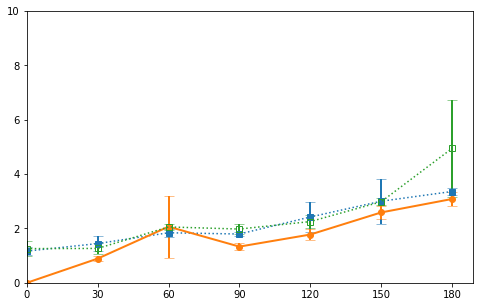

Trial 1
Reading ../Users/1/2.txt
[1.1009749999999912, 1.2509499999999747, 1.977125000000001, 1.808924999999988, 2.252350000000007, 3.0123000000000104, 3.4412750000000187]
[0.0767580736795962, 0.20417689022019742, 0.09707075705380126, 0.13982060604574115, 0.4031600767685112, 0.32153138260518527, 0.16513096885505127]


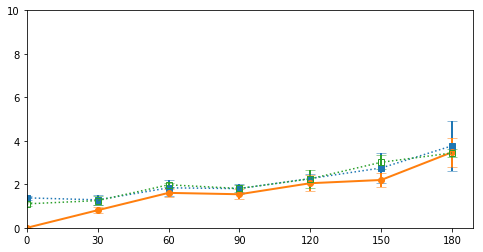

Trial 0
Reading ../Users/2/1.txt
[1.2656000000000063, 1.3733249999999977, 2.102975000000008, 2.784825000000012, 3.64674999999999, 3.886400000000009, 4.38172500000001]
[0.16033098577630583, 0.10135505352471899, 0.09207356773254412, 0.4590789821751802, 0.48050107440047013, 0.8130789844781522, 0.5523809209911179]


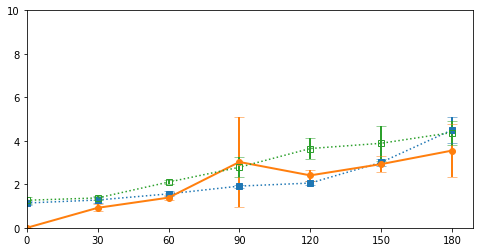

Trial 1
Reading ../Users/2/2.txt
[1.1099500000000084, 1.0345749999999967, 1.5911499999999954, 1.9843249999999912, 1.8898999999999901, 2.429640000000012, 3.0046250000000114]
[0.07855980206186983, 0.21271973785947065, 0.1511827619141721, 0.8445628436504992, 0.1970024619135616, 0.30384209451619876, 0.31300839745124476]


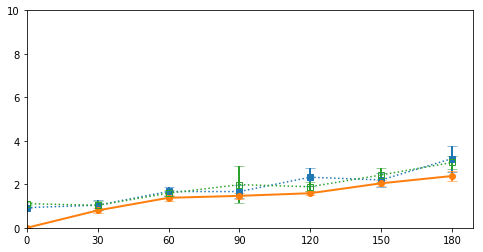

Trial 0
Reading ../Users/3/1.txt
[1.5073249999999945, 1.7668999999999926, 2.0675999999999704, 2.8630750000000234, 2.938659999999982, 3.897900000000007, 6.568040000000008]
[0.19303952153637427, 0.13564997235533463, 0.23476445642387397, 0.41120389331206464, 0.280495551479892, 0.6129391038267735, 2.4481331782400972]


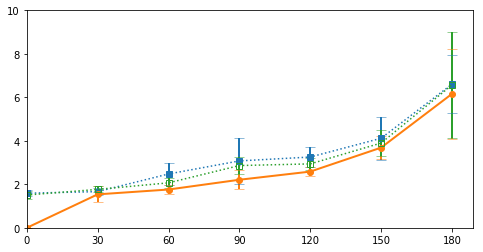

Trial 1
Reading ../Users/3/2.txt
[1.4131749999999954, 1.3798400000000015, 1.9442599999999857, 2.866199999999992, 4.354674999999958, 3.50932499999999, 3.779449999999997]
[0.37057134518876084, 0.13332798055921818, 0.20075305825814257, 1.1923612321775983, 2.5812399969540025, 0.5572116490840776, 0.18335638112701236]


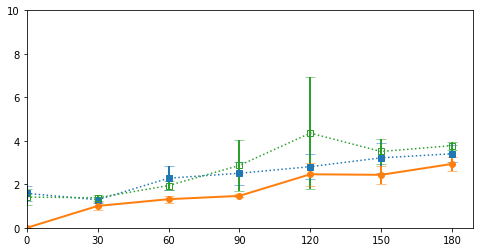

Trial 0
Reading ../Users/4/1.txt
[1.0616750000000366, 1.1525500000000193, 2.7280000000000086, 1.9163999999999817, 2.228925000000004, 3.333000000000027, 5.960775000000012]
[0.050103711189879316, 0.17268377891399506, 1.7357954545394843, 0.16151351336651248, 0.28033450889070544, 0.14410324423828172, 1.7279275872775905]


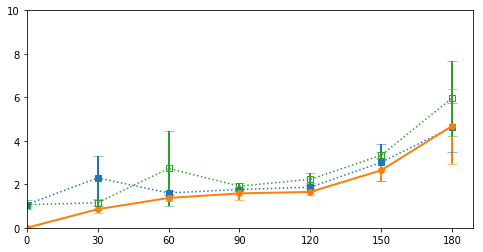

Trial 1
Reading ../Users/4/2.txt
[1.050239999999991, 1.0952399999999898, 1.8225000000000193, 1.7968250000000126, 1.6856499999999954, 2.616159999999991, 4.289275000000011]
[0.0790122167768959, 0.17714846428913192, 0.21444573905768766, 0.07964221164057554, 0.24637352231923698, 0.694154843244633, 1.1304667053367745]


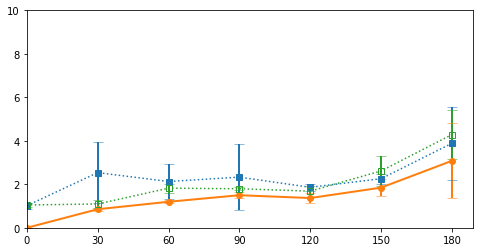

Trial 0
Reading ../Users/5/1.txt
[1.5701999999999998, 1.3362999999999943, 1.9895379999999876, 2.148105000000008, 2.613837500000006, 4.116094999999994, 6.097072500000007]
[0.4691551875445829, 0.11263753814782324, 0.48294578471707933, 0.21902995930921496, 0.2689614455990874, 0.5710655593493642, 1.008864114372563]


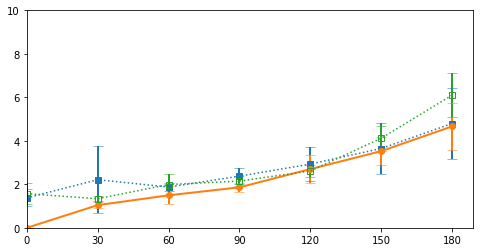

Trial 1
Reading ../Users/5/2.txt
[1.318950000000001, 1.4600750000000033, 2.2424000000000035, 1.91784999999998, 2.400500000000001, 3.0308750000000018, 3.7344800000000133]
[0.13905327216572858, 0.23754240016259665, 0.3751219868256145, 0.15079029312261377, 0.6289641166235248, 0.749267323373315, 0.8385648463893489]


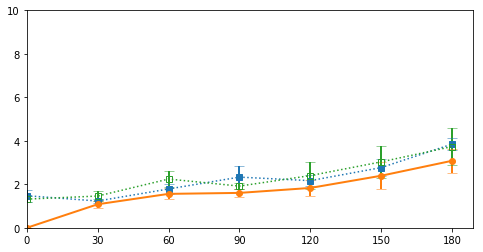

Trial 0
Reading ../Users/6/1.txt
[1.682725000000005, 1.5591500000000025, 2.5891749999999973, 2.5315499999999886, 2.9917000000000087, 4.117674999999988, 5.597674999999995]
[0.2635959443447392, 0.18810798095774686, 0.5687542851487046, 0.3464326233194466, 0.6309916362361834, 0.8468180305561603, 0.4034401403864062]


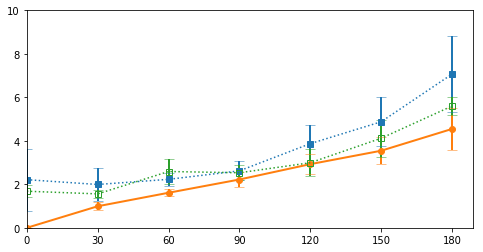

Trial 1
Reading ../Users/6/2.txt
[1.2017999999999915, 1.304249999999989, 2.4833749999999952, 2.4491199999999878, 2.392649999999989, 3.4001499999999965, 4.063700000000011]
[0.25682909687182653, 0.31323665574131937, 0.7065482162421688, 0.2171138540029006, 0.8362316948668983, 0.5301895250756886, 0.8392283390115179]


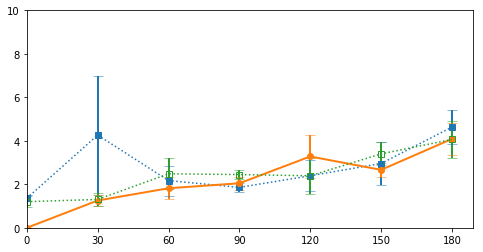

Trial 0
Reading ../Users/7/1.txt
[1.431750000000008, 1.0173000000000059, 1.375700000000009, 2.9785500000000127, 1.7674000000000092, 5.333624999999998, 4.5137]
[0.08944999999998515, 0.08299999999999841, 0.11020000000000607, 1.35745, 0.06530000000000769, 0.02462500000000034, 0.9474854440394745]


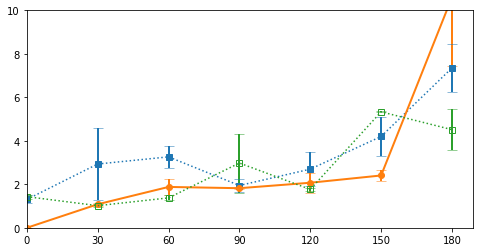

Trial 1
Reading ../Users/7/2.txt
[1.1866999999999948, 2.6422600000000074, 1.667350000000006, 1.4760000000000062, 1.5998000000000019, 1.9342999999999932, 2.9376499999999908]
[0.16380000000000194, 1.209140000000005, 0.11725000000000563, 0.008000000000002672, 0.03300000000000125, 0.1833999999999918, 1.247950000000003]


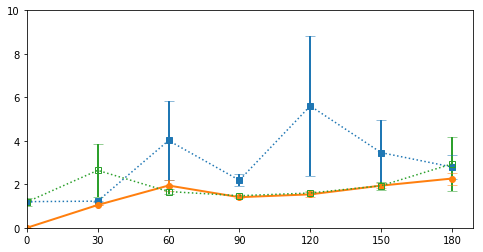

Trial 0
Reading ../Users/8/1.txt
[1.6730666666666802, 2.461750000000009, 3.189050000000009, 3.710550000000012, 3.5938500000000033, 4.617149999999981, 4.805299999999988]
[0.14854548873060572, 0.12214999999999065, 0.7913500000000226, 0.43225000000001046, 0.48535000000001105, 0.061350000000004457, 0.5283000000000015]


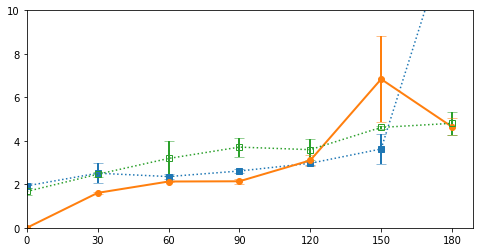

Trial 1
Reading ../Users/8/2.txt
[2.0117000000000047, 2.1381000000000085, 2.9039999999999964, 2.705050000000014, 3.055900000000001, 4.16995, 5.944550000000007]
[0.18710000000000093, 0.17339999999998668, 0.06209999999998672, 0.22735000000001548, 0.37759999999999394, 0.21505000000001928, 0.3886499999999984]


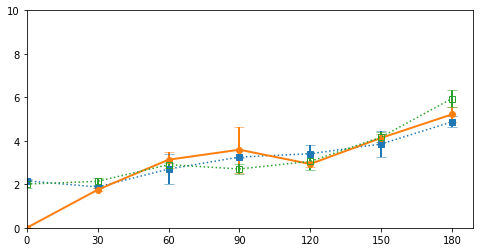

Trial 0
Reading ../Users/9/1.txt
[1.4792049999999932, 0.9242999999999952, 2.743404999999999, 1.4582499999999996, 1.9532250000000104, 3.285890000000002, 7.311499999999995]
[0.6355050000000091, 0.1687000000000083, 1.496704999999995, 0.21735000000000326, 0.12412499999999937, 0.729689999999998, 0.8667000000000087]


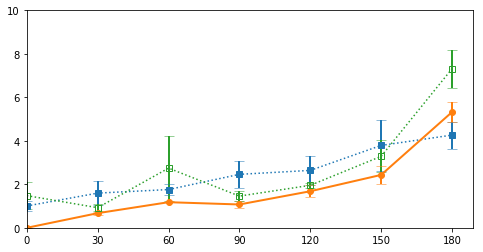

Trial 1
Reading ../Users/9/2.txt
[0.8691499999999905, 1.2796000000000163, 3.147100000000023, 2.539100000000019, 1.3147500000000036, 2.0062500000000227, 4.669949999999972]
[0.008150000000000546, 0.8407977045639274, 2.7647527062409423, 1.7628214108827645, 0.039550000000019736, 0.4384499999999889, 2.679550000000006]


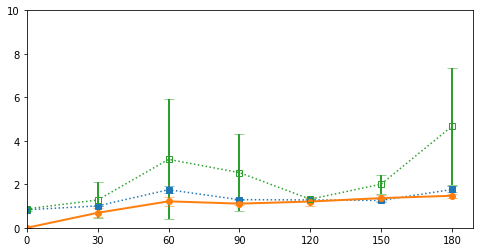

In [64]:

fig, ax = plt.subplots(figsize=(8,5))
for uid in range(9):
    baseFolder=str(uid+1)

    idx=[1,2]

    for i in range(len(idx)):
        print("Trial "+str(i))
        read_plot("../Users/"+baseFolder+"/"+str(idx[i])+".txt",i,fig)
    